In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [163]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [164]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [230]:
n = X.shape[0]

eta = 1e-2
n_iter = 1000

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if (i % 10 == 0) & (i >= 390):
        eta /= 1.001
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}, eta={eta:0.10f}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #390: W_new = [43.89217756  4.02471993], MSE = 44.63, eta=0.0099900100
Iteration #400: W_new = [43.99453647  4.00615872], MSE = 44.52, eta=0.0099800300
Iteration #410: W_new = [44.08785334  3.98923714], MSE = 44.42, eta=0.0099700599
Iteration #420: W_new = [44.17293471  3.97380895], MSE = 44.35, eta=0.0099600998
Iteration #430: W_new = [44.25051451  3.95974105], MSE = 44.29, eta=0.0099501497
Iteration #440: W_new = [44.32126063  3.94691233], MSE = 44.23, eta=0.0099402094
Iteration #450: W_new = [44.38578092  3.93521257], MSE = 44.19, eta=0.0099302792
Iteration #460: W_new = [44.44462865  3.92454144], MSE = 44.15, eta=0.0099203588
Iteration #470: W_new = [44.49830746  3.91480762], MSE = 44.12, eta=0.0099104484
Iteration #480: W_new = [44.54727582  3.90592796], MSE = 44.1, eta=0.0099005478
Iteration #490: W_new = [44.59195117  3.89782678], MSE = 44.07, eta=0.0098906571
Iteration #500: W_ne

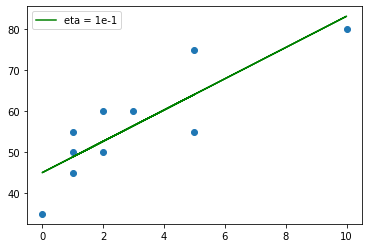

In [231]:
y_pred_3 = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, label='eta = 1e-1', c='g')
plt.legend()
plt.show()

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [161]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
#     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X[:, 1], y_pred - y))
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [4.77 4.27], MSE = 3047.75
Iteration #10: W_new = [10.39080638  9.89080638], MSE = 610.5
Iteration #20: W_new = [10.42479324  9.92479324], MSE = 608.57
Iteration #30: W_new = [10.42499875  9.92499875], MSE = 608.56
Iteration #40: W_new = [10.42499999  9.92499999], MSE = 608.56
Iteration #50: W_new = [10.425  9.925], MSE = 608.56
Iteration #60: W_new = [10.425  9.925], MSE = 608.56
Iteration #70: W_new = [10.425  9.925], MSE = 608.56
Iteration #80: W_new = [10.425  9.925], MSE = 608.56
Iteration #90: W_new = [10.425  9.925], MSE = 608.56


3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖 .

In [229]:
n = X.shape[0]

eta = 1e-2
n_iter = 1000

w = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {w} \n')

# критерий останова (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-6

# зададим начальную разницу весов большим числом
weight_dist = np.inf

while weight_dist > min_weight_dist:
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    new_w = w.copy()
    for k in range(w.shape[0]):
        w[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if (i % 10 == 0) | (i >= 890):
        eta /= 1.001
        print(f'Iteration #{i}: w_new = {w}, MSE = {round(err, 2)}, eta={eta:0.10f}')
    weight_dist = np.linalg.norm(new_w - w, ord=2)

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #2269: w_new = [2.08 4.27], MSE = 3047.75, eta=0.0099900100
Iteration #2269: w_new = [2.91136863 6.69097902], MSE = 1777.04, eta=0.0099800300
Iteration #2269: w_new = [3.5803439  8.23826791], MSE = 1233.56, eta=0.0099700599
Iteration #2269: w_new = [4.14275203 9.21948958], MSE = 996.18, eta=0.0099600998
Iteration #2269: w_new = [4.63475665 9.83383692], MSE = 887.88, eta=0.0099501497
Iteration #2269: w_new = [ 5.07980162 10.21036058], MSE = 834.16, eta=0.0099402094
Iteration #2269: w_new = [ 5.49309796 10.43271244], MSE = 803.62, eta=0.0099302792
Iteration #2269: w_new = [ 5.88452504 10.55514473], MSE = 783.02, eta=0.0099203588
Iteration #2269: w_new = [ 6.26050744 10.61286067], MSE = 766.78, eta=0.0099104484
Iteration #2269: w_new = [ 6.62522999 10.62871434], MSE = 752.52, eta=0.0099005478
Iteration #2269: w_new = [ 6.98142451 10.61754982], MSE = 739.25, eta=0.0098906571
Iteration #2269:

Iteration #2269: w_new = [41.30242177  4.49433221], MSE = 50.72, eta=0.0073649922
Iteration #2269: w_new = [41.32767753  4.48975247], MSE = 50.63, eta=0.0073576346
Iteration #2269: w_new = [41.35273859  4.48520803], MSE = 50.54, eta=0.0073502843
Iteration #2269: w_new = [41.37760662  4.4806986 ], MSE = 50.45, eta=0.0073429413
Iteration #2269: w_new = [41.40228328  4.47622387], MSE = 50.36, eta=0.0073356057
Iteration #2269: w_new = [41.42677019  4.47178354], MSE = 50.28, eta=0.0073282775
Iteration #2269: w_new = [41.45106899  4.46737733], MSE = 50.19, eta=0.0073209565
Iteration #2269: w_new = [41.47518127  4.46300494], MSE = 50.11, eta=0.0073136429
Iteration #2269: w_new = [41.49910865  4.45866608], MSE = 50.03, eta=0.0073063365
Iteration #2269: w_new = [41.52285268  4.45436047], MSE = 49.95, eta=0.0072990375
Iteration #2269: w_new = [41.54641493  4.45008782], MSE = 49.87, eta=0.0072917457
Iteration #2269: w_new = [41.56979696  4.44584785], MSE = 49.79, eta=0.0072844613
Iteration #2269:

Iteration #2269: w_new = [44.42640401  3.9278462 ], MSE = 44.16, eta=0.0054243110
Iteration #2269: w_new = [44.42955073  3.92727559], MSE = 44.16, eta=0.0054188921
Iteration #2269: w_new = [44.43267876  3.92670837], MSE = 44.16, eta=0.0054134786
Iteration #2269: w_new = [44.43578822  3.92614452], MSE = 44.16, eta=0.0054080706
Iteration #2269: w_new = [44.43887924  3.92558401], MSE = 44.15, eta=0.0054026679
Iteration #2269: w_new = [44.44195194  3.92502682], MSE = 44.15, eta=0.0053972706
Iteration #2269: w_new = [44.44500645  3.92447294], MSE = 44.15, eta=0.0053918788
Iteration #2269: w_new = [44.44804288  3.92392232], MSE = 44.15, eta=0.0053864923
Iteration #2269: w_new = [44.45106136  3.92337497], MSE = 44.15, eta=0.0053811112
Iteration #2269: w_new = [44.45406202  3.92283085], MSE = 44.14, eta=0.0053757354
Iteration #2269: w_new = [44.45704497  3.92228994], MSE = 44.14, eta=0.0053703651
Iteration #2269: w_new = [44.46001032  3.92175221], MSE = 44.14, eta=0.0053650001
Iteration #2269:

Iteration #2269: w_new = [44.89417976  3.84302228], MSE = 43.98, eta=0.0039711145
Iteration #2269: w_new = [44.89478935  3.84291174], MSE = 43.98, eta=0.0039671474
Iteration #2269: w_new = [44.89539613  3.84280171], MSE = 43.98, eta=0.0039631842
Iteration #2269: w_new = [44.89600011  3.84269219], MSE = 43.98, eta=0.0039592249
Iteration #2269: w_new = [44.8966013   3.84258317], MSE = 43.98, eta=0.0039552697
Iteration #2269: w_new = [44.89719973  3.84247466], MSE = 43.98, eta=0.0039513184
Iteration #2269: w_new = [44.8977954   3.84236664], MSE = 43.98, eta=0.0039473710
Iteration #2269: w_new = [44.89838833  3.84225912], MSE = 43.98, eta=0.0039434276
Iteration #2269: w_new = [44.89897854  3.8421521 ], MSE = 43.98, eta=0.0039394881
Iteration #2269: w_new = [44.89956604  3.84204556], MSE = 43.98, eta=0.0039355525
Iteration #2269: w_new = [44.90015084  3.84193952], MSE = 43.98, eta=0.0039316209
Iteration #2269: w_new = [44.90073296  3.84183396], MSE = 43.98, eta=0.0039276932
Iteration #2269:

Iteration #2269: w_new = [44.99937198  3.82394729], MSE = 43.97, eta=0.0028985314
Iteration #2269: w_new = [44.99953885  3.82391703], MSE = 43.97, eta=0.0028956357
Iteration #2269: w_new = [44.99970512  3.82388688], MSE = 43.97, eta=0.0028927430
Iteration #2269: w_new = [44.99987078  3.82385684], MSE = 43.97, eta=0.0028898531
Iteration #2269: w_new = [45.00003584  3.82382691], MSE = 43.97, eta=0.0028869662
Iteration #2269: w_new = [45.00020031  3.82379709], MSE = 43.97, eta=0.0028840821
Iteration #2269: w_new = [45.00036417  3.82376737], MSE = 43.97, eta=0.0028812009
Iteration #2269: w_new = [45.00052744  3.82373777], MSE = 43.97, eta=0.0028783226
Iteration #2269: w_new = [45.00069012  3.82370827], MSE = 43.97, eta=0.0028754471
Iteration #2269: w_new = [45.00085221  3.82367888], MSE = 43.97, eta=0.0028725745
Iteration #2269: w_new = [45.00101371  3.82364959], MSE = 43.97, eta=0.0028697048
Iteration #2269: w_new = [45.00117463  3.82362041], MSE = 43.97, eta=0.0028668380
Iteration #2269:

Iteration #2269: w_new = [45.03163419  3.81809704], MSE = 43.97, eta=0.0021156489
Iteration #2269: w_new = [45.03169374  3.81808624], MSE = 43.97, eta=0.0021135354
Iteration #2269: w_new = [45.03175312  3.81807547], MSE = 43.97, eta=0.0021114239
Iteration #2269: w_new = [45.03181233  3.81806474], MSE = 43.97, eta=0.0021093146
Iteration #2269: w_new = [45.03187136  3.81805403], MSE = 43.97, eta=0.0021072074
Iteration #2269: w_new = [45.03193022  3.81804336], MSE = 43.97, eta=0.0021051023
Iteration #2269: w_new = [45.03198891  3.81803272], MSE = 43.97, eta=0.0021029993
Iteration #2269: w_new = [45.03204743  3.8180221 ], MSE = 43.97, eta=0.0021008984
Iteration #2269: w_new = [45.03210578  3.81801152], MSE = 43.97, eta=0.0020987996
Iteration #2269: w_new = [45.03216396  3.81800097], MSE = 43.97, eta=0.0020967029
Iteration #2269: w_new = [45.03222196  3.81799046], MSE = 43.97, eta=0.0020946083
Iteration #2269: w_new = [45.0322798   3.81797997], MSE = 43.97, eta=0.0020925158
Iteration #2269:

Iteration #2269: w_new = [45.04408428  3.81583941], MSE = 43.97, eta=0.0015504062
Iteration #2269: w_new = [45.04411032  3.81583468], MSE = 43.97, eta=0.0015488574
Iteration #2269: w_new = [45.0441363   3.81582997], MSE = 43.97, eta=0.0015473100
Iteration #2269: w_new = [45.04416221  3.81582528], MSE = 43.97, eta=0.0015457643
Iteration #2269: w_new = [45.04418806  3.81582059], MSE = 43.97, eta=0.0015442201
Iteration #2269: w_new = [45.04421385  3.81581591], MSE = 43.97, eta=0.0015426774
Iteration #2269: w_new = [45.04423958  3.81581125], MSE = 43.97, eta=0.0015411363
Iteration #2269: w_new = [45.04426524  3.81580659], MSE = 43.97, eta=0.0015395967
Iteration #2269: w_new = [45.04429085  3.81580195], MSE = 43.97, eta=0.0015380586
Iteration #2269: w_new = [45.04431639  3.81579732], MSE = 43.97, eta=0.0015365221
Iteration #2269: w_new = [45.04434187  3.8157927 ], MSE = 43.97, eta=0.0015349871
Iteration #2269: w_new = [45.04436729  3.81578809], MSE = 43.97, eta=0.0015334536
Iteration #2269:

Iteration #2269: w_new = [45.04992492  3.8147803 ], MSE = 43.97, eta=0.0011327790
Iteration #2269: w_new = [45.04993791  3.81477794], MSE = 43.97, eta=0.0011316473
Iteration #2269: w_new = [45.04995087  3.81477559], MSE = 43.97, eta=0.0011305168
Iteration #2269: w_new = [45.04996381  3.81477324], MSE = 43.97, eta=0.0011293874
Iteration #2269: w_new = [45.04997673  3.8147709 ], MSE = 43.97, eta=0.0011282591
Iteration #2269: w_new = [45.04998961  3.81476857], MSE = 43.97, eta=0.0011271320
Iteration #2269: w_new = [45.05000247  3.81476623], MSE = 43.97, eta=0.0011260060
Iteration #2269: w_new = [45.05001531  3.81476391], MSE = 43.97, eta=0.0011248811
Iteration #2269: w_new = [45.05002811  3.81476158], MSE = 43.97, eta=0.0011237574
Iteration #2269: w_new = [45.05004089  3.81475927], MSE = 43.97, eta=0.0011226347
Iteration #2269: w_new = [45.05005365  3.81475695], MSE = 43.97, eta=0.0011215132
Iteration #2269: w_new = [45.05006638  3.81475465], MSE = 43.97, eta=0.0011203928
Iteration #2269:

Iteration #2269: w_new = [45.05301208  3.81422049], MSE = 43.97, eta=0.0008243441
Iteration #2269: w_new = [45.05301921  3.8142192 ], MSE = 43.97, eta=0.0008235206
Iteration #2269: w_new = [45.05302633  3.8142179 ], MSE = 43.97, eta=0.0008226979
Iteration #2269: w_new = [45.05303344  3.81421662], MSE = 43.97, eta=0.0008218760
Iteration #2269: w_new = [45.05304053  3.81421533], MSE = 43.97, eta=0.0008210550
Iteration #2269: w_new = [45.05304762  3.81421404], MSE = 43.97, eta=0.0008202347
Iteration #2269: w_new = [45.05305469  3.81421276], MSE = 43.97, eta=0.0008194153
Iteration #2269: w_new = [45.05306175  3.81421148], MSE = 43.97, eta=0.0008185967
Iteration #2269: w_new = [45.05306879  3.8142102 ], MSE = 43.97, eta=0.0008177789
Iteration #2269: w_new = [45.05307583  3.81420893], MSE = 43.97, eta=0.0008169620
Iteration #2269: w_new = [45.05308285  3.81420766], MSE = 43.97, eta=0.0008161458
Iteration #2269: w_new = [45.05308986  3.81420638], MSE = 43.97, eta=0.0008153305
Iteration #2269:

Iteration #2269: w_new = [45.05467575  3.81391881], MSE = 43.97, eta=0.0006132275
Iteration #2269: w_new = [45.05468013  3.81391801], MSE = 43.97, eta=0.0006126149
Iteration #2269: w_new = [45.0546845   3.81391722], MSE = 43.97, eta=0.0006120029
Iteration #2269: w_new = [45.05468886  3.81391643], MSE = 43.97, eta=0.0006113915
Iteration #2269: w_new = [45.05469322  3.81391564], MSE = 43.97, eta=0.0006107807
Iteration #2269: w_new = [45.05469757  3.81391485], MSE = 43.97, eta=0.0006101705
Iteration #2269: w_new = [45.05470191  3.81391406], MSE = 43.97, eta=0.0006095609
Iteration #2269: w_new = [45.05470624  3.81391328], MSE = 43.97, eta=0.0006089520
Iteration #2269: w_new = [45.05471057  3.81391249], MSE = 43.97, eta=0.0006083437
Iteration #2269: w_new = [45.05471489  3.81391171], MSE = 43.97, eta=0.0006077359
Iteration #2269: w_new = [45.05471921  3.81391093], MSE = 43.97, eta=0.0006071288
Iteration #2269: w_new = [45.05472352  3.81391015], MSE = 43.97, eta=0.0006065223
Iteration #2269:

Iteration #2269: w_new = [45.0557657   3.81372116], MSE = 43.97, eta=0.0004489412
Iteration #2269: w_new = [45.05576846  3.81372066], MSE = 43.97, eta=0.0004484927
Iteration #2269: w_new = [45.05577122  3.81372016], MSE = 43.97, eta=0.0004480446
Iteration #2269: w_new = [45.05577396  3.81371966], MSE = 43.97, eta=0.0004475970
Iteration #2269: w_new = [45.05577671  3.81371916], MSE = 43.97, eta=0.0004471499
Iteration #2269: w_new = [45.05577945  3.81371867], MSE = 43.97, eta=0.0004467032
Iteration #2269: w_new = [45.05578219  3.81371817], MSE = 43.97, eta=0.0004462569
Iteration #2269: w_new = [45.05578492  3.81371768], MSE = 43.97, eta=0.0004458111
Iteration #2269: w_new = [45.05578765  3.81371718], MSE = 43.97, eta=0.0004453657
Iteration #2269: w_new = [45.05579038  3.81371669], MSE = 43.97, eta=0.0004449208
Iteration #2269: w_new = [45.0557931   3.81371619], MSE = 43.97, eta=0.0004444763
Iteration #2269: w_new = [45.05579582  3.8137157 ], MSE = 43.97, eta=0.0004440323
Iteration #2269:

Iteration #2269: w_new = [45.05646609  3.81359416], MSE = 43.97, eta=0.0003286679
Iteration #2269: w_new = [45.0564679   3.81359383], MSE = 43.97, eta=0.0003283395
Iteration #2269: w_new = [45.0564697  3.8135935], MSE = 43.97, eta=0.0003280115
Iteration #2269: w_new = [45.05647151  3.81359317], MSE = 43.97, eta=0.0003276838
Iteration #2269: w_new = [45.05647331  3.81359285], MSE = 43.97, eta=0.0003273565
Iteration #2269: w_new = [45.05647511  3.81359252], MSE = 43.97, eta=0.0003270295
Iteration #2269: w_new = [45.0564769  3.8135922], MSE = 43.97, eta=0.0003267027
Iteration #2269: w_new = [45.0564787   3.81359187], MSE = 43.97, eta=0.0003263764
Iteration #2269: w_new = [45.05648049  3.81359155], MSE = 43.97, eta=0.0003260503
Iteration #2269: w_new = [45.05648228  3.81359122], MSE = 43.97, eta=0.0003257246
Iteration #2269: w_new = [45.05648407  3.8135909 ], MSE = 43.97, eta=0.0003253992
Iteration #2269: w_new = [45.05648585  3.81359057], MSE = 43.97, eta=0.0003250741
Iteration #2269: w_n

Iteration #2269: w_new = [45.05693341  3.81350942], MSE = 43.97, eta=0.0002403759
Iteration #2269: w_new = [45.05693463  3.81350919], MSE = 43.97, eta=0.0002401358
Iteration #2269: w_new = [45.05693585  3.81350897], MSE = 43.97, eta=0.0002398959
Iteration #2269: w_new = [45.05693706  3.81350875], MSE = 43.97, eta=0.0002396563
Iteration #2269: w_new = [45.05693828  3.81350853], MSE = 43.97, eta=0.0002394168
Iteration #2269: w_new = [45.05693949  3.81350831], MSE = 43.97, eta=0.0002391777
Iteration #2269: w_new = [45.05694071  3.81350809], MSE = 43.97, eta=0.0002389387
Iteration #2269: w_new = [45.05694192  3.81350787], MSE = 43.97, eta=0.0002387000
Iteration #2269: w_new = [45.05694313  3.81350765], MSE = 43.97, eta=0.0002384616
Iteration #2269: w_new = [45.05694434  3.81350743], MSE = 43.97, eta=0.0002382233
Iteration #2269: w_new = [45.05694554  3.81350721], MSE = 43.97, eta=0.0002379854
Iteration #2269: w_new = [45.05694675  3.813507  ], MSE = 43.97, eta=0.0002377476
Iteration #2269: